In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

final_data = pd.read_csv('Cleaned_Dataset.csv')

# De impact van Groene ruimtes en Economische welvaart op de Levenskwaliteit

### Groene Ruimtes

Door de relatie tussen luchtkwaliteit, mentale gezondheid en geluidsniveaus te onderzoeken, kunnen we vaststellen hoe groene ruimtes de levenskwaliteit van stadsbewoners kunnen verbeteren.

##### Luchtkwaliteit

Een goede luchtkwaliteit is belangrijk voor onze gezondheid en daarmee de levenskwaliteit (RIVM, 2024). Volgens Hoffman (2009) wordt de luchtkwaliteit verbeterd door de aanwezigheid van planten en bomen. Deze kunnen schadelijke stoffen zoals koolstofdioxide (CO₂), stikstofoxiden (NOₓ) en fijnstof (PM10 en PM2.5) uit de lucht absorberen en vasthouden. Door fotosynthese produceren planten zuurstof, wat de luchtkwaliteit verder verbetert (Hoffman, 2009). 

Aan de hand van de dataset hebben we de relatie tussen het percentage groene ruimte en de luchtkwaliteitsindex geanalyseerd door middel van een spreidingsdiagram. Op de y-as staat de luchtkwaliteitsindex, die de aanwezigheid van verontreinigende stoffen meet; lagere waarden duiden op een betere luchtkwaliteit. Op de x-as staat het percentage groene ruimte in een stad. 

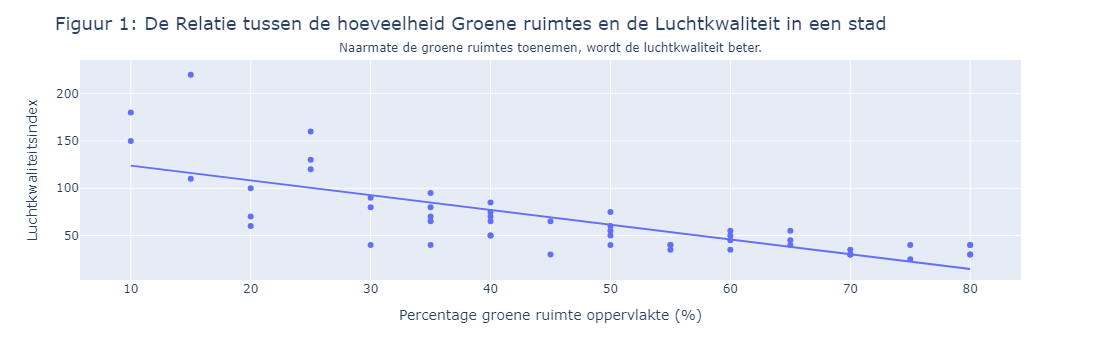

Correlatiecoëfficiënt tussen de hoeveelheid groene ruimtes en de luchtkwaliteit: -0.7580726544901705


In [6]:
fig = px.scatter(
    final_data,
    x='Green_Space_Area',
    y='Air_Quality_Index',
    labels={
        'Green_Space_Area': 'Percentage groene ruimte oppervlakte (%)',
        'Air_Quality_Index': 'Luchtkwaliteitsindex'
    },
    trendline='ols'
)

fig.update_layout(
    title='Figuur 1: De Relatie tussen de hoeveelheid Groene ruimtes en de Luchtkwaliteit in een stad',
    title_font_size=18,  
    annotations=[
        dict(
            x=0.5,
            y=1.1,
            showarrow=False,
            text="Naarmate de groene ruimtes toenemen, wordt de luchtkwaliteit beter.",
            xref="paper",
            yref="paper",
            align="center"
        )
    ]
)

fig.show()

# Bereken de correlatiecoëfficiënt
correlation = final_data['Green_Space_Area'].corr(final_data['Air_Quality_Index'])
print("Correlatiecoëfficiënt tussen de hoeveelheid groene ruimtes en de luchtkwaliteit:", correlation)

Uit het spreidingsdiagram blijkt dat naarmate het percentage groene ruimtes toeneemt, de luchtkwaliteitsindex daalt. Deze afname van de luchtkwaliteitsindex bij een hoger percentage groene ruimtes suggereert dat groene ruimtes inderdaad een positief effect hebben op de luchtkwaliteit. Dit wordt verder ondersteund door de berekende correlatiecoëfficiënt van -0,76. De correlatiecoëfficiënt is een maat die de sterkte en richting van een lineaire relatie tussen twee variabelen aangeeft. De waarde van de correlatiecoëfficiënt kan variëren tussen -1 en 1. Een waarde van -0,76 duidt dus op een zeer sterke negatieve relatie tussen het percentage groene ruimtes en de luchtkwaliteitsindex.

##### Mentale Gezondheid

Volgens het RIVM (2022) vermindert groene ruimte stress, wat suggereert dat groene ruimtes de mentale gezondheid verbeteren. Aan de hand van een spreidingsdiagram hebben we onderzocht of er een verband is tussen het percentage groene ruimtes in een stad en de mentale gezondheid. Op de y-as staat de geluks score en op de x-as staat het percentage groene ruimtes in een stad.

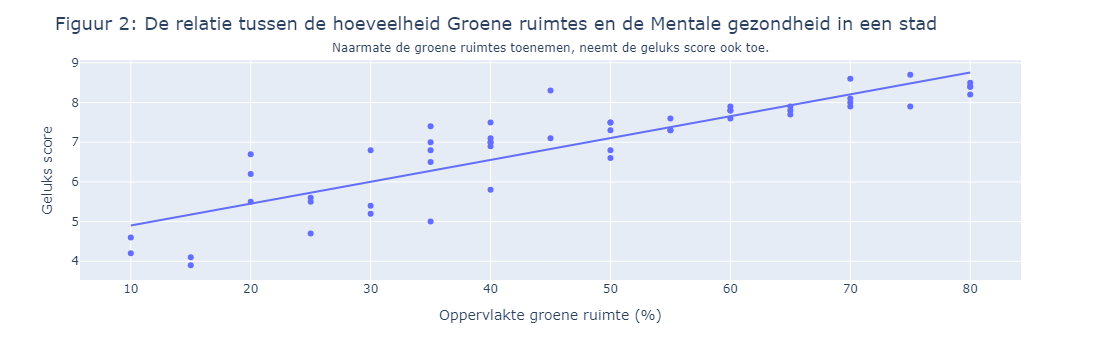

Correlatiecoëfficiënt tussen de hoeveelheid groene ruimtes en de geluks score: 0.8750309148985129


In [7]:
fig = px.scatter(
    final_data,
    x='Green_Space_Area',
    y='Happiness_Score',
    labels={
        'Green_Space_Area': 'Oppervlakte groene ruimte (%)',
        'Happiness_Score': 'Geluks score'
    },
    trendline='ols'
)

fig.update_layout(
    title='Figuur 2: De relatie tussen de hoeveelheid Groene ruimtes en de Mentale gezondheid in een stad',
    title_font_size=18, 
    annotations=[
        dict(
            x=0.5,
            y=1.1,
            showarrow=False,
            text="Naarmate de groene ruimtes toenemen, neemt de geluks score ook toe.",
            xref="paper",
            yref="paper",
            align="center"
        )
    ]
)

fig.show()

# Bereken de correlatiecoëfficiënt
correlation = final_data['Green_Space_Area'].corr(final_data['Happiness_Score'])
print("Correlatiecoëfficiënt tussen de hoeveelheid groene ruimtes en de geluks score:", correlation)


Uit het spreidingsdiagram blijkt een sterke correlatie tussen het percentage groene ruimtes en de geluksscore. De opwaartse trend van de lijn illustreert dit duidelijk. De correlatiecoëfficiënt van 0.88 bevestigt dat groene ruimtes een grote positieve impact hebben op de mentale gezondheid.

##### Geluidsniveau

Typisch zijn gebieden met groene ruimtes rustiger dan stedelijke omgevingen. Te hoge geluidsniveaus kunnen onrust veroorzaken en als hinderlijk worden ervaren (RIVM, 2021). Geluidsniveaus boven de 80 decibel kunnen zelfs schadelijk zijn (VeiligheidNL, z.d.). Met behulp van het onderstaande staafdiagram kunnen we de relatie tussen geluidsniveaus en de hoeveelheid groene ruimtes onderzoeken. Op de x-as staat het geluidsniveau in decibel en op de y-as staat het percentage groene ruimte in oppervlakte.

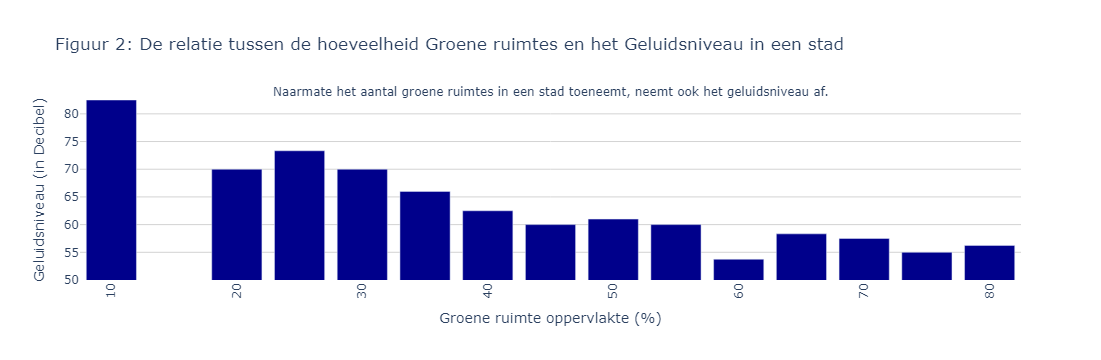

Correlatiecoëfficiënt tussen de hoeveelheid groene ruimtes en het geluidsniveau: -0.8537171843669009


In [8]:

aggregated_data = final_data.groupby('Green_Space_Area')['Decibel_Level'].mean().reset_index()
aggregated_data = aggregated_data[aggregated_data['Green_Space_Area'] != 15]


fig = px.bar(aggregated_data, x='Green_Space_Area', y='Decibel_Level',
             labels={'Green_Space_Area': 'Groene ruimte oppervlakte (%)', 'Decibel_Level': 'Geluidsniveau (in Decibel)'},
             title='Figuur 2: De relatie tussen de hoeveelheid Groene ruimtes en het Geluidsniveau in een stad',
             color_discrete_sequence=['darkblue'])


fig.update_layout(
    xaxis_tickangle=-90,  
    yaxis=dict(gridcolor='LightGrey', range=[50, max(aggregated_data['Decibel_Level'])], dtick=5),  
    plot_bgcolor='white'  
)


fig.add_annotation(
    x=0.5,
    y=1.1,
    showarrow=False,
    text="Naarmate het aantal groene ruimtes in een stad toeneemt, neemt ook het geluidsniveau af.",
    xref="paper",
    yref="paper",
    align="center"
)

fig.show()


correlation = final_data['Decibel_Level'].corr(final_data['Green_Space_Area'])
print("Correlatiecoëfficiënt tussen de hoeveelheid groene ruimtes en het geluidsniveau:", correlation)

Zoals te zien in het staafdiagram, laten hogere percentages groene ruimte over het algemeen een lager gemeten decibel zien. De sterke correlatiecoëfficiënt van -0.85 benadrukt een zeer sterke negatieve relatie tussen deze variabelen. Het aanwezig zijn van groene ruimtes kan dus sterk  bijdragen aan een rustigere omgeving.

Om te controleren of een hoog geluidsniveau daadwerkelijk als hinderlijk en onrustig kan worden ervaren, zullen we dit onderzoeken door het geluidsniveau uit te zetten tegen de geluksscore. In het onderstaande spreidingsdiagram zetten we het geluidsniveau op de x-as en de geluks score op de y-as.

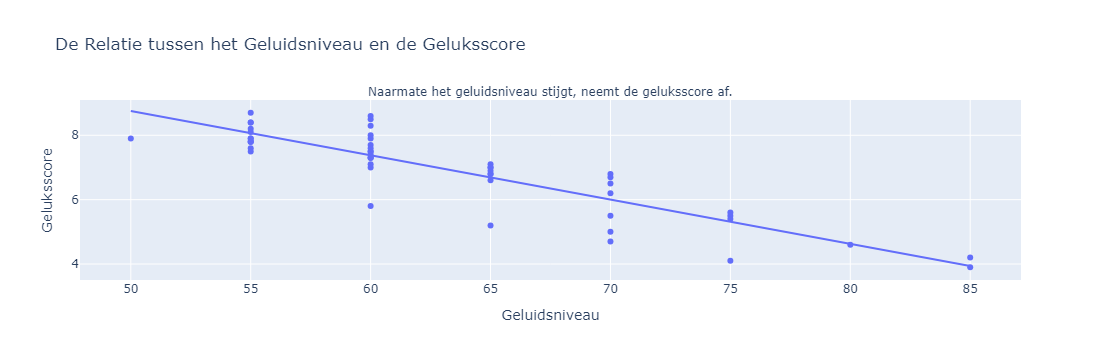

Correlatiecoëfficiënt tussen het geluidsniveau en de geluksscore: -0.8801908025133692


In [9]:
plot_data = final_data[['Decibel_Level', 'Happiness_Score']]

fig = px.scatter(plot_data, x='Decibel_Level', y='Happiness_Score', trendline='ols',
                 title='De Relatie tussen het Geluidsniveau en de Geluksscore',
                 labels={
                     'Decibel_Level': 'Geluidsniveau',
                     'Happiness_Score': 'Geluksscore'
                 })

fig.add_annotation(
    x=0.5,
    y=1.1,
    showarrow=False,
    text="Naarmate het geluidsniveau stijgt, neemt de geluksscore af.",
    xref="paper",
    yref="paper",
    align="center"
)


fig.show()

correlation = final_data['Decibel_Level'].corr(final_data['Happiness_Score'])
print("Correlatiecoëfficiënt tussen het geluidsniveau en de geluksscore:", correlation)

Uit het spreidingsdiagram blijkt dat er inderdaad een zeer sterke relatie is tussen het geluidsniveau en de geluks score. Dit wordt ook bevestigd door de zeer sterke correlatiecoëfficiënt van -0.88.  Groene ruimtes zijn daarom belangrijk voor het verlagen van het geluidsniveau, wat onrust vermindert en daarmee de levenskwaliteit verbetert.

### Economische Welvaart

Een sterke economie kan bijdragen aan verbeterde mentale gezondheid en gezondheidszorg, wat leidt tot een betere algehele levenskwaliteit.

##### Mentale gezondheid

Kosten van levensonderhoud verwijzen naar de uitgaven die nodig zijn om te voorzien in de basisbehoeften van de inwoners van een stad (Nibud, 2024). Steden met hogere kosten van levensonderhoud hebben over het algemeen een sterkere economie en hogere salarissen (Workwide, z.d.). Volgens Veenhoven (2011) zijn rijkere landen gelukkiger. Door een analyse van het onderstaande lijndiagram, waarbij de x-as de kosten van levensonderhoud index weergeeft (die aangeeft hoe duur het is om in een stad te leven in vergelijking met een referentiestad) en de y-as de geluksscore, kunnen we onderzoeken of een sterkere economie gepaard gaat met een hogere geluksscore.

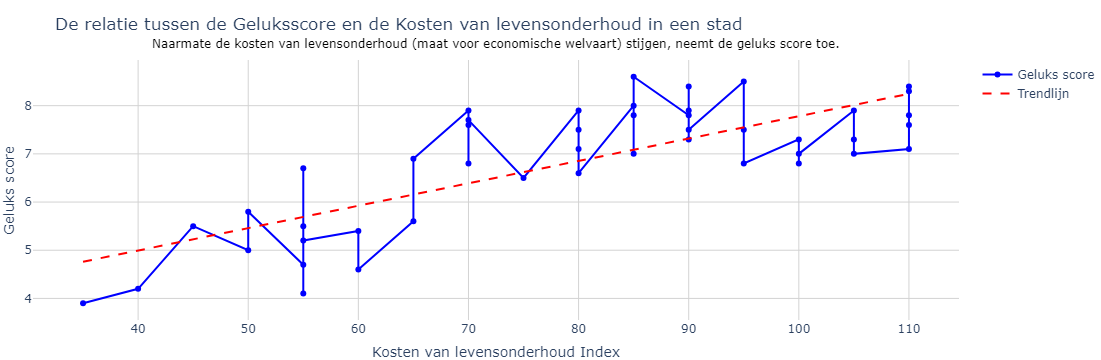

Correlatiecoëfficiënt tussen de geluksscore en de kosten van levensonderhoud index: 0.7307286571569004


In [10]:
data_filtered = final_data[['Cost_of_Living_Index', 'Happiness_Score']].drop_duplicates()
data_filtered = data_filtered[data_filtered['Cost_of_Living_Index'] <= 110] 
data_filtered = data_filtered.sort_values(by='Cost_of_Living_Index')

X = data_filtered['Cost_of_Living_Index'].values.reshape(-1, 1)
y = data_filtered['Happiness_Score'].values

model = LinearRegression()
model.fit(X, y)
trendline = model.predict(X)


fig = go.Figure()

fig.update_layout(
    annotations=[
        dict(
            x=0.5,
            y=1.1,
            xref='paper',
            yref='paper',
            text="Naarmate de kosten van levensonderhoud (maat voor economische welvaart) stijgen, neemt de geluks score toe.",
            showarrow=False,
            font=dict(
                size=12,
                color="black"
            )
        )
    ]
)

fig.add_trace(go.Scatter(x=data_filtered['Cost_of_Living_Index'], y=data_filtered['Happiness_Score'],
                         mode='lines+markers',
                         line=dict(color='blue'),
                         name='Geluks score'))


fig.add_trace(go.Scatter(x=data_filtered['Cost_of_Living_Index'], y=trendline,
                         mode='lines',
                         line=dict(color='red', dash='dash'),
                         name='Trendlijn'))

fig.update_layout(
    title='De relatie tussen de Geluksscore en de Kosten van levensonderhoud in een stad',
    xaxis_title='Kosten van levensonderhoud Index',
    yaxis_title='Geluks score',
    xaxis=dict(showgrid=True, zeroline=False, gridcolor='LightGrey'), 
    yaxis=dict(showgrid=True, zeroline=False, gridcolor='LightGrey'),
    plot_bgcolor='white',
    margin=dict(l=0, r=0, t=60, b=0)
)


fig.show()

correlation = final_data['Cost_of_Living_Index'].corr(final_data['Happiness_Score'])
print("Correlatiecoëfficiënt tussen de geluksscore en de kosten van levensonderhoud index:", correlation)


Zoals te zien is in het lijndiagram, neemt de geluks score toe naarmate de kosten van levensonderhoud index stijgen. De correlatiecoëfficiënt van 0.73 bevestigt een zeer sterke relatie. Dit bevestigt dat een sterke economie de mentale gezondheid bevordert en daarmee de algemene levenskwaliteit verbetert. 

##### Gezondheidszorg

Een goede gezondheidszorg is essentieel om ziekten te voorkomen of te genezen. Hieronder is een spreidingsdiagram weergegeven waarin de relatie tussen de kosten van levensonderhoud index (de gebruikte maat voor economische welvaart) op de x-as is uitgezet tegen de gezondheidszorg index op de y-as. De gezondheidszorg index geeft de kwaliteit van de gezondheidszorg aan.

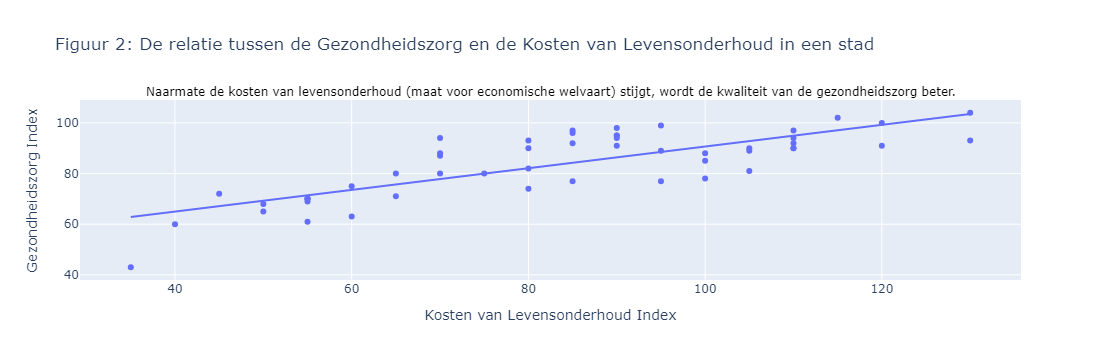

Correlatiecoëfficiënt tussen de kosten van levensonderhoud index en de gezondheidszorg index: 0.7953588152812198


In [11]:

fig = px.scatter(
    final_data,
    x='Cost_of_Living_Index',
    y='Healthcare_Index',
    title='Figuur 2: De relatie tussen de Gezondheidszorg en de Kosten van Levensonderhoud in een stad',
    labels={
        'Cost_of_Living_Index': 'Kosten van Levensonderhoud Index',
        'Healthcare_Index': 'Gezondheidszorg Index'
    },
    trendline='ols'
)


fig.update_layout(
    annotations=[
        dict(
            x=0.5,
            y=1.1,
            xref='paper',
            yref='paper',
            text="Naarmate de kosten van levensonderhoud (maat voor economische welvaart) stijgt, wordt de kwaliteit van de gezondheidszorg beter.",
            showarrow=False,
            font=dict(
                size=12,
                color="black"
            )
        )
    ]
)

fig.show()


correlation = final_data['Healthcare_Index'].corr(final_data['Cost_of_Living_Index'])
print("Correlatiecoëfficiënt tussen de kosten van levensonderhoud index en de gezondheidszorg index:", correlation)

In het diagram is duidelijk te zien dat er een positieve correlatie bestaat tussen de kosten van levensonderhoud index en de gezondheidszorg index. Naarmate de kosten van levensonderhoud stijgen, neemt ook de kwaliteit van de gezondheidszorg toe, zoals aangegeven door de sterke correlatiecoëfficiënt van 0.80. Dit suggereert dat een hogere economische welvaart vaak gepaard gaat met verbeteringen in de gezondheidszorg, wat de levenskwaliteit kan verbeteren.

*Infrastructuur*

Economische welvaart kan de levenskwaliteit verbeteren. Bij een goede economische welvaart is echter een goed ontwikkelde infrastructuur noodzakelijk, omdat deze bijdraagt aan een betere economie (Thissen et al., 2006). Een goed ontwikkelde infrastructuur kan echter leiden tot het verlies van groene gebieden.

# Samenvatting

Groene gebieden kunnen de levenskwaliteit van stadsbewoners verhogen door een betere luchtkwaliteit, verbetering van de mentale gezondheid en lagere geluidsniveaus te bieden. Een goede economie kan ook de levenskwaliteit van stadsbewoners verhogen door bij te dragen aan verbeterde mentale gezondheid en een betere gezondheidszorg. Echter, voor een sterke economie is goede infrastructuur noodzakelijk, wat kan leiden tot het verlies van groene gebieden. Aangezien zowel groene ruimtes als economische welvaart een zeer groot effect hebben op de levenskwaliteit, ontstaat een dilemma waarbij we moeten afwegen wat het meest bijdraagt aan een betere levenskwaliteit. Het optimaliseren van de levenskwaliteit vereist daarom een balans tussen het behoud van groene ruimtes en de ontwikkeling van infrastructuur.

# Referenties
Centraal Bureau voor de Statistiek. (z.d.). Dossier verstedelijking. Centraal Bureau Voor de Statistiek. https://www.cbs.nl/nl-nl/dossier/dossier-verstedelijking

Frakt, A. B. (2018). How the Economy Affects Health. JAMA, 319(12), 1187. https://doi.org/10.1001/jama.2018.1739 

Hoffman, M. (2009). Planten en luchtkwaliteit. https://library.wur.nl/WebQuery/wurpubs/399478

Huijgen, M. (2021, 23 juni). Het belang van groen in de stad - Bureau voor ruimte en vrije tijd. Bureau voor ruimte en vrije tijd.   https://ruimteenvrijetijd.nl/het-belang-van-groen-in-de-stad/

Mouissie, S., & Kraniotis, L. (2023). Schreeuwend tekort aan woningen en hoge huizenprijzen: hoe is het zo gekomen? NOS. https://nos.nl/collectie/13960/artikel/2497415-schreeuwend-tekort-aan-woningen-en-hoge-huizenprijzen-hoe-is-het-zo-gekomen

Nibud. (2024, 31 mei). Huishoudelijke uitgaven - Nibud. https://www.nibud.nl/onderwerpen/uitgaven/huishoudelijke-uitgaven/#:~:text=Elk%20huishouden%20heeft%20te%20maken,de%20kapper%20en%20eventuele%20huisdieren.

RIVM. (2021, 16 juni). Effecten van geluid. https://www.rivm.nl/geluid/over-geluid/effecten-van-geluid#:~:text=Geluid%20kan%20leiden%20tot%20hinder,en%20psychische%20aandoeningen%20wordt%20verhoogd.

RIVM. (2022, 17 mei). Effecten van groen op fysieke en mentale gezondheid. https://www.rivm.nl/nieuws/effecten-van-groen-op-fysieke-en-mentale-gezondheid

RIVM. (2024, 5 juni). Luchtkwaliteit. https://www.rivm.nl/lucht

Thissen, M., Van de Coevering, P., & Hilbers, H. (2006). Wegen naar economische groei. NAi Uitgevers. https://www.pbl.nl/sites/default/files/downloads/Wegen_naar_economische_groei.pdf

Veenhoven, R. (2011). MAAKT GELD GELUKKIG? In Wat Iedereen Moet Weten van de Menswetenschappen: De Gammacanon. Erasmus Universiteit Rotterdam. https://repub.eur.nl/pub/32903/metis_172911.pdf